## 1.Load Dataset

In [5]:
import pandas as pd

df_chemstry = pd.read_excel(r"..\..\data\raw\Dataset\earthchem\earthchem_australia_sample.xlsx")


## 2.Dataset Overview

In [6]:
df_chemstry.head()

,SAMPLE ID,IGSN,SOURCE,DOI,TITLE,JOURNAL,AUTHOR,CRUISEID,LATITUDE,LONGITUDE,...,W_PPM,ZN_ppm.1,ZN_PPM.1,ZN_wt%.1,ARSENIC_ppb.2,ARSENIC_ppm.2,ARSENIC_PPM.2,ARSENIC_ppb.3,ARSENIC_ppm.3,ARSENIC_PPM.3
0,142-279,NaN,GEOROC,10.1093/petrology/egh014,EVIDENCE FOR EARLY LREE-ENRICHED MANTLE SOURCE...,J. PETROL.,"SMITHIES, R. H.; CHAMPION, D. C.; SUN, SHEN-SU",NaN,-20.8,117.8,...,NaN,48.34,48.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,142-194,NaN,GEOROC,10.1093/petrology/egh014,EVIDENCE FOR EARLY LREE-ENRICHED MANTLE SOURCE...,J. PETROL.,"SMITHIES, R. H.; CHAMPION, D. C.; SUN, SHEN-SU",NaN,-20.8,117.8,...,NaN,49.05,49.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,142359,NaN,GEOROC,10.1093/petrology/egh014,EVIDENCE FOR EARLY LREE-ENRICHED MANTLE SOURCE...,J. PETROL.,"SMITHIES, R. H.; CHAMPION, D. C.; SUN, SHEN-SU",NaN,-20.8,117.8,...,NaN,50.01,50.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,142360,NaN,GEOROC,10.1093/petrology/egh014,EVIDENCE FOR EARLY LREE-ENRICHED MANTLE SOURCE...,J. PETROL.,"SMITHIES, R. H.; CHAMPION, D. C.; SUN, SHEN-SU",NaN,-20.8,117.8,...,NaN,51.91,51.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,142363,NaN,GEOROC,10.1093/petrology/egh014,EVIDENCE FOR EARLY LREE-ENRICHED MANTLE SOURCE...,J. PETROL.,"SMITHIES, R. H.; CHAMPION, D. C.; SUN, SHEN-SU",NaN,-20.8,117.8,...,NaN,88.00,88.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Shape
print("Number of samples:", df_chemstry.shape[0])
print("Number of columns:", df_chemstry.shape[1])

# Column info
df_chemstry.info()


Number of samples: 15351
Number of columns: 152
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15351 entries, 0 to 15350
Columns: 152 entries, SAMPLE ID to ARSENIC_PPM.3
dtypes: float64(136), object(16)
memory usage: 17.8+ MB


## 3.Missing Value Summary

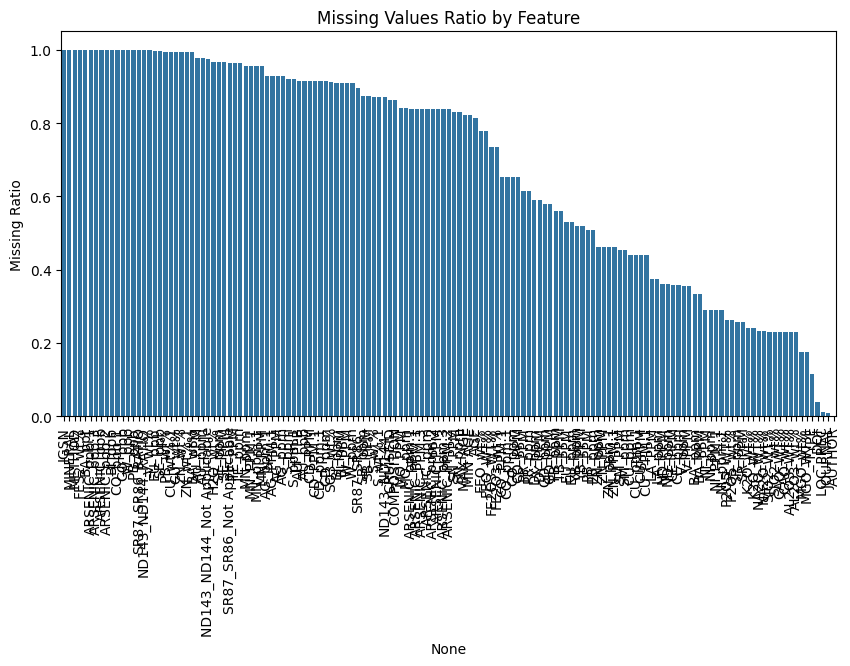

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Missing values per column
missing = df_chemstry.isnull().mean().sort_values(ascending=False)
missing = missing[missing > 0]

plt.figure(figsize=(10, 5))
sns.barplot(x=missing.index, y=missing.values)
plt.xticks(rotation=90)
plt.title("Missing Values Ratio by Feature")
plt.ylabel("Missing Ratio")
plt.show()


## 4.Latitude and Longitude Check

In [12]:
# Check coordinates
df_chemstry[["LATITUDE", "LONGITUDE"]].describe()

,LATITUDE,LONGITUDE
count,15351.000000,15351.000000
mean,-29.281477,133.040340
std,7.105184,11.965786
min,-43.948284,112.044700
25%,-34.980000,121.399860
50%,-30.450000,131.656100
75%,-24.110120,145.000000
max,-10.070000,153.357800


## 5. Sample Distribution on Map

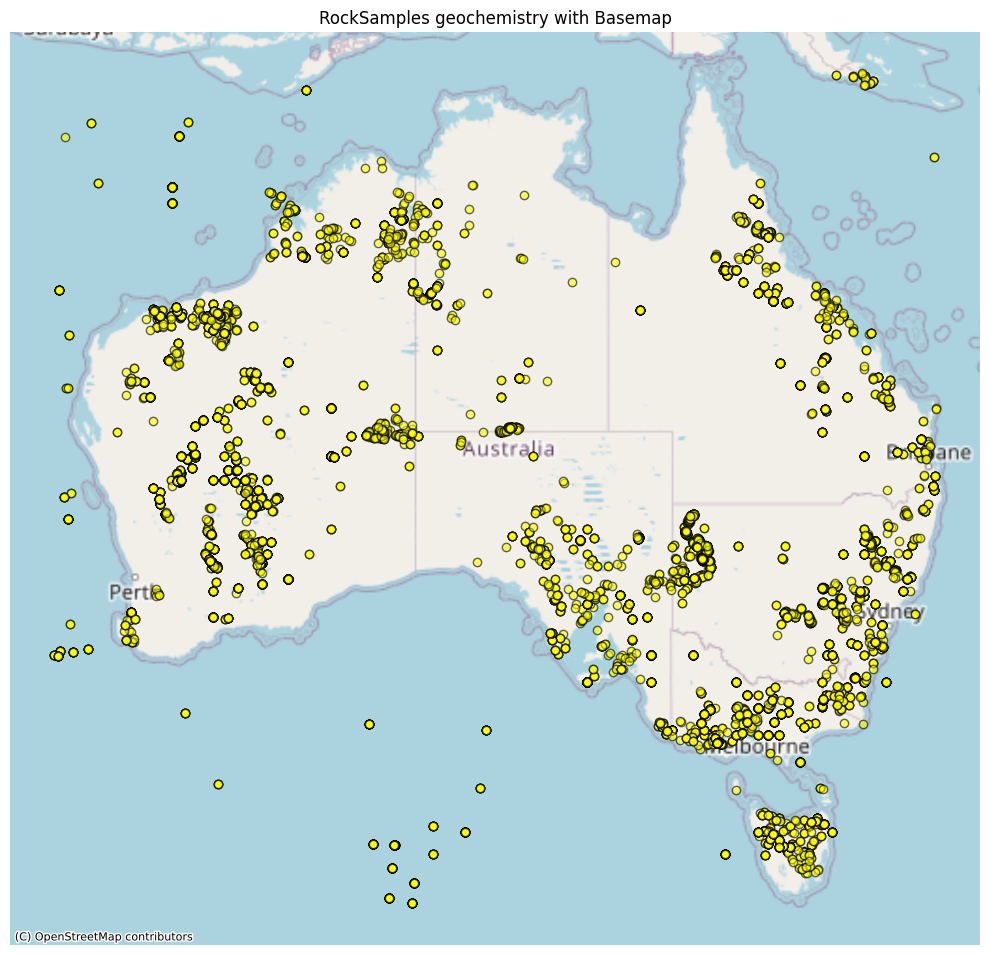

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df_chemstry['LONGITUDE'], df_chemstry['LATITUDE'])]
gdf = gpd.GeoDataFrame(df_chemstry, geometry=geometry, crs='EPSG:4326')  

gdf_web = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))
gdf_web.plot(ax=ax, alpha=0.6, color='yellow', edgecolor='k')

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title('RockSamples geochemistry with Basemap')
ax.set_axis_off()
plt.tight_layout()
plt.show()